In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/web_traffic.csv')
df

,Timestamp,TrafficCount
0,2020-01-20 00:00:00,487.0
1,2020-01-20 00:30:00,385.0
2,2020-01-20 01:30:00,269.0
3,2020-01-20 02:30:00,517.0
4,2020-01-20 03:30:00,129.0
...,...,...
2788,2020-05-17 08:30:00,521.0
2789,2020-05-17 09:30:00,1003.0
2790,2020-05-17 10:30:00,1442.0
2791,2020-05-17 11:30:00,1334.0


<ipython-input-19-57d992f5e997>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean().interpolate()


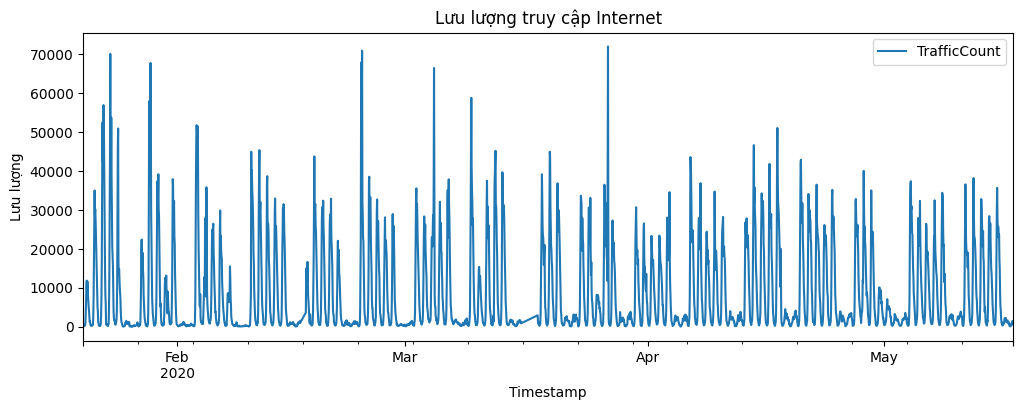

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/web_traffic.csv', parse_dates=['Timestamp'])
df = df.sort_values('Timestamp')
df.set_index('Timestamp', inplace=True)

# Tùy theo dữ liệu có thể cần resample theo giờ
df_hourly = df.resample('H').mean().interpolate()

# Hiển thị dữ liệu
df_hourly.plot(figsize=(12, 4), title="Lưu lượng truy cập Internet")
plt.ylabel("Lưu lượng")
plt.show()

Phan tich pho FFT

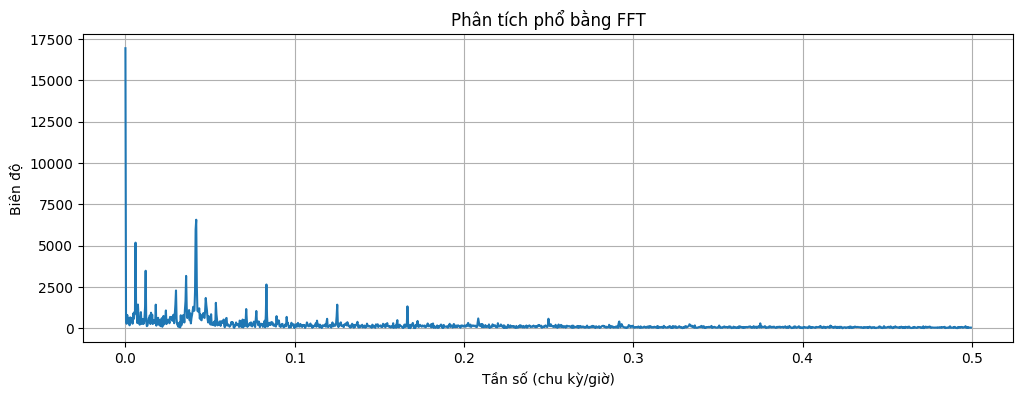

In [ ]:
from scipy.fft import fft, fftfreq

# Chuỗi thời gian
y = df_hourly['TrafficCount'].values
N = len(y)
T = 1.0  # Giả sử khoảng thời gian giữa các mẫu là 1 giờ

# FFT
yf = fft(y)
xf = fftfreq(N, T)[:N // 2]  # chỉ lấy phần dương của phổ

# Biểu diễn phổ
plt.figure(figsize=(12, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Phân tích phổ bằng FFT")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid()
plt.show()

Du doan luu luong trong tuong lai gan

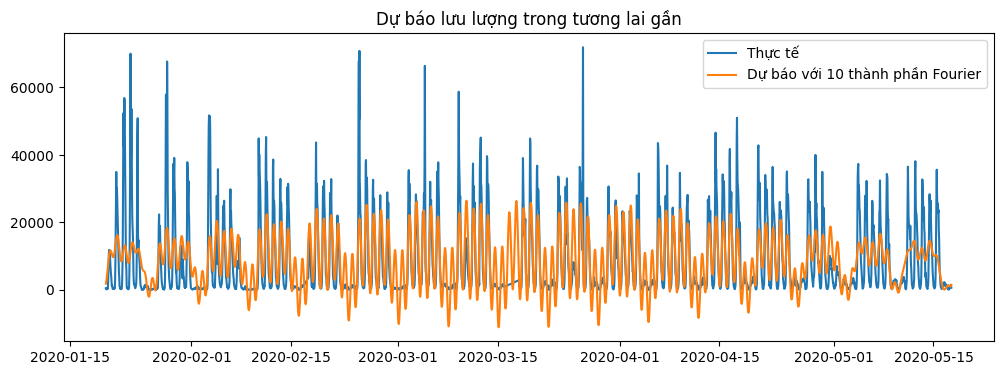

In [ ]:
# Giữ lại một số tần số quan trọng (ví dụ: 10)
N_KEEP = 10
yf_filtered = np.zeros_like(yf)
indices = np.argsort(np.abs(yf))[-N_KEEP:]  # Chọn tần số mạnh nhất
yf_filtered[indices] = yf[indices]

# Biến đổi ngược
y_smooth = np.real(np.fft.ifft(yf_filtered))

# Vẽ so sánh
plt.figure(figsize=(12, 4))
plt.plot(df_hourly.index, y, label="Thực tế")
plt.plot(df_hourly.index, y_smooth, label=f"Dự báo với {N_KEEP} thành phần Fourier")
plt.legend()
plt.title("Dự báo lưu lượng trong tương lai gần")
plt.show()

Truc quan hoa chu ky

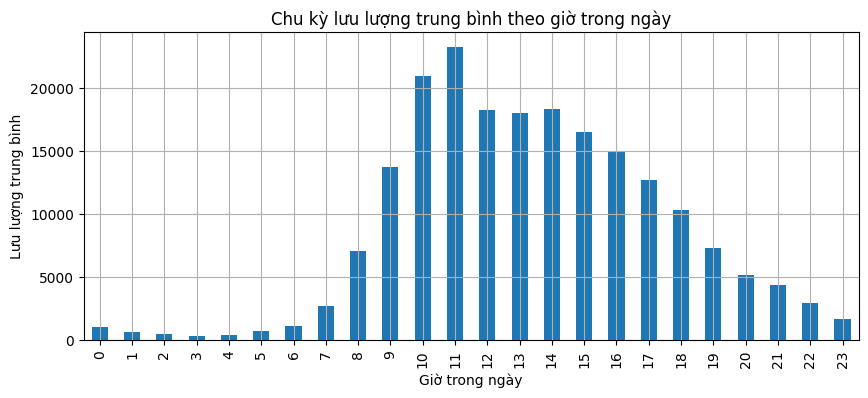

In [ ]:
df_hourly['hour'] = df_hourly.index.hour
avg_by_hour = df_hourly.groupby('hour')['TrafficCount'].mean()

plt.figure(figsize=(10, 4))
avg_by_hour.plot(kind='bar')
plt.title("Chu kỳ lưu lượng trung bình theo giờ trong ngày")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Lưu lượng trung bình")
plt.grid()
plt.show()